In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import errorbar
import tikzplotlib

In [11]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [12]:
plt.style.use('seaborn-v0_8-muted')

In [3]:
timing_data = np.array([[[11.109, 11.446, 11.812],
                         [19.201, 19.431, 19.732],
                         [82.125, 83.166, 85.192],
                         [9.603, 9.792, 10.393],
                         [22.123, 22.409, 22.849],
                         [116.501, 118.558, 118.719]],
                        [[10.287, 11.017, 11.154],
                         [16.519, 16.534, 16.573],
                         [40.759, 40.937, 41.553],
                         [10.353, 10.587, 10.982],
                         [19.128, 19.714, 19.744],
                         [55.408, 56.168, 56.341]]])

In [4]:
timing_data[0,:,1]

array([ 11.446,  19.431,  83.166,   9.792,  22.409, 118.558])

<ErrorbarContainer object of 3 artists>

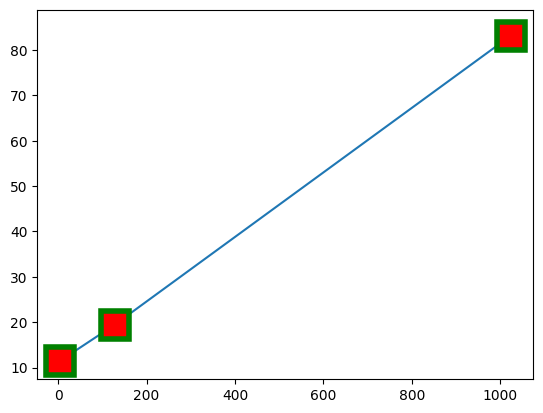

In [5]:
x, y, yerr = [4,128,1024], timing_data[0,:3,1], [timing_data[0,:3,1] - timing_data[0,:3,0], timing_data[0,:3,2] - timing_data[0,:3,1]]
errorbar(x, y, yerr, marker='s', mfc='red',
         mec='green', ms=20, mew=4)

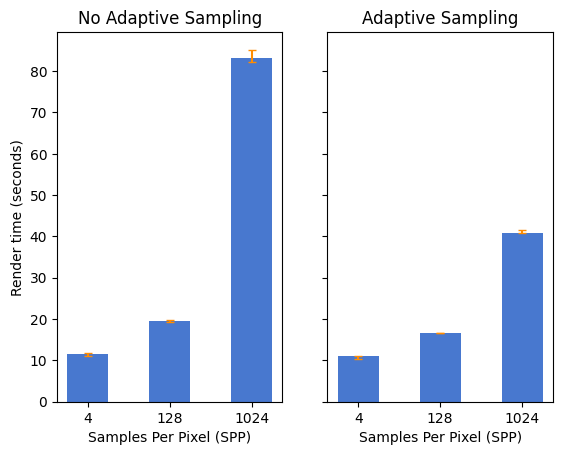

In [102]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
# plt.subplot(1,2,1)
x, y, yerr = ['4','128','1024'], timing_data[0,:3,1], [timing_data[0,:3,1] - timing_data[0,:3,0], timing_data[0,:3,2] - timing_data[0,:3,1]]
ax1.bar(x, y, width=0.5)
ax1.errorbar(x, y, yerr=yerr, fmt="none", color='darkorange', capsize=3)
ax1.set(xlabel='Samples Per Pixel (SPP)', ylabel='Render time (seconds)')
ax1.set_title('No Adaptive Sampling')

# plt.subplot(1,2,2)
x, y, yerr = ['4','128','1024'], timing_data[1,:3,1], [timing_data[1,:3,1] - timing_data[1,:3,0], timing_data[1,:3,2] - timing_data[1,:3,1]]
ax2.bar(x, y, width=0.5)
ax2.errorbar(x, y, yerr=yerr, fmt="none", color='darkorange', capsize=3)
ax2.set_title('Adaptive Sampling')
ax2.set(xlabel='Samples Per Pixel (SPP)')

tikzplotlib.save("timing_data.tex")

In [89]:
tiling_patterns = np.array([[19.255, 19.675, 21.023],
                            [8.795, 8.892, 9.097],
                            [7.454, 7.504, 7.529],
                            [7.030, 7.136, 7.206]])

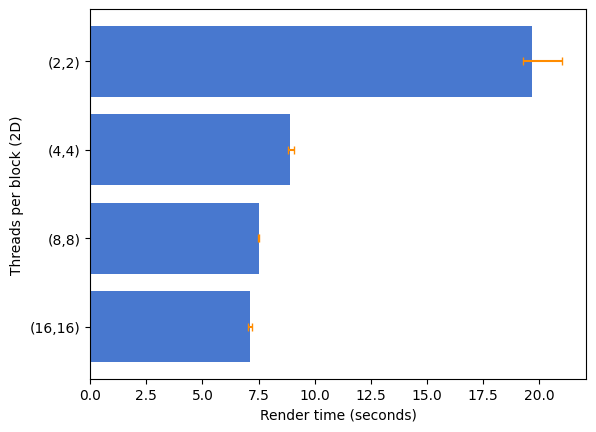

In [103]:
fig, ax = plt.subplots()

# Example data
tiling_pattern = ('(2,2)', '(4,4)', '(8,8)', '(16,16)')
y_pos = np.arange(len(tiling_pattern))
performance = tiling_patterns[:,1]
error = np.array([tiling_patterns[:,1] - tiling_patterns[:,0], tiling_patterns[:,2] - tiling_patterns[:,1]])

ax.barh(y_pos, performance, xerr=error, align='center', ecolor='darkorange', capsize=3)
ax.set_yticks(y_pos, labels=tiling_pattern)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Render time (seconds)')
ax.set_ylabel('Threads per block (2D)')

tikzplotlib.save("tiling_patterns.tex")